# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).


In [63]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [46]:


# load the training dataset
data = pd.read_csv('data/real_estate.csv')
                    #parse_dates = ['transaction_date'],
                    #infer_datetime_format = True)
#data["transaction_date"] = data.transaction_date.dt.to_period('D')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


## Check the null values

In [25]:
data.isnull().sum()

transaction_date            0
house_age                   0
transit_distance            0
local_convenience_stores    0
latitude                    0
longitude                   0
price_per_unit              0
dtype: int64

## Label distribution


C:\Users\Shivani\AppData\Local\Temp\ipykernel_1376\549149575.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


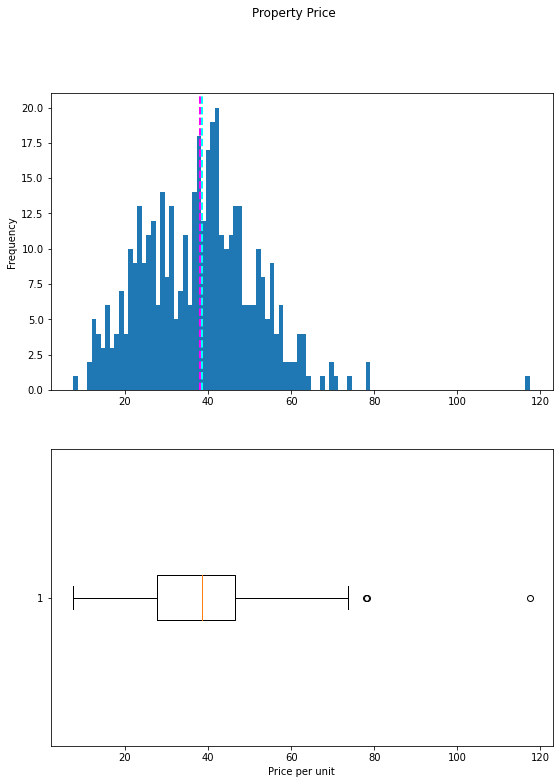

In [35]:
label = data["price_per_unit"]
fig,ax = plt.subplots(2,1,figsize=(9,12))
ax[0].hist(label,bins = 100)
ax[0].set_ylabel("Frequency")

ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

ax[1].boxplot(label,vert = False)
ax[1].set_xlabel("Price per unit")

fig.suptitle("Property Price")
fig.show()

## Remove the outliers

Shape: (411, 7)


C:\Users\Shivani\AppData\Local\Temp\ipykernel_1376\2424221437.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


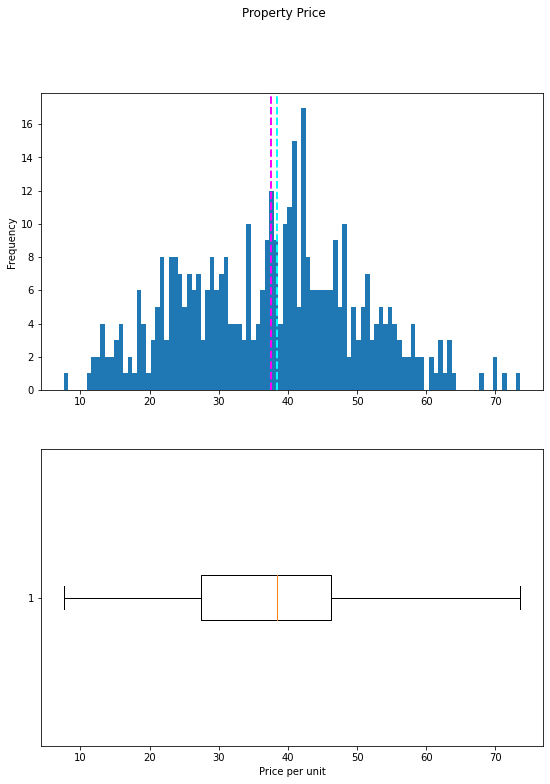

In [47]:
data = data[data["price_per_unit"] < 75]
print("Shape:" ,data.shape)

label = data["price_per_unit"]
fig,ax = plt.subplots(2,1,figsize=(9,12))
ax[0].hist(label,bins = 100)
ax[0].set_ylabel("Frequency")

ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

ax[1].boxplot(label,vert = False)
ax[1].set_xlabel("Price per unit")

fig.suptitle("Property Price")
fig.show()

## Numeric features Analysis

In [48]:
#data['transaction_date'] = pd.DatetimeIndex(data["transaction_date"])
print("Shape :", data.shape)

numeric_features = ["transaction_date","house_age", "transit_distance","local_convenience_stores", "latitude", "longitude"]
data[numeric_features +  ["price_per_unit"]].describe()

Shape : (411, 7)


,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000
mean,2013.147019,17.638929,1089.953902,4.077859,24.968993,121.533328,37.591241
std,0.281884,11.354608,1264.697946,2.932371,0.012446,0.015391,12.768915
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,8.950000,289.324800,1.000000,24.962990,121.527600,27.500000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.400000
75%,2013.417000,27.800000,1455.798000,6.000000,24.977705,121.543395,46.300000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,73.600000


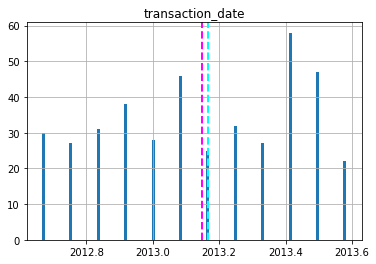

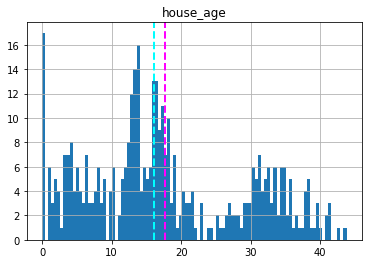

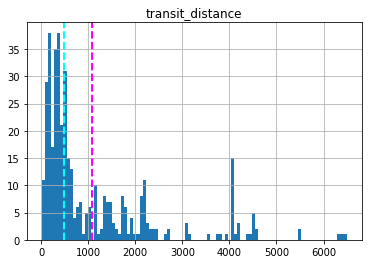

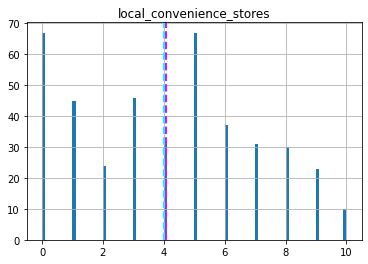

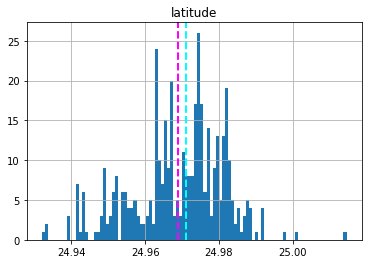

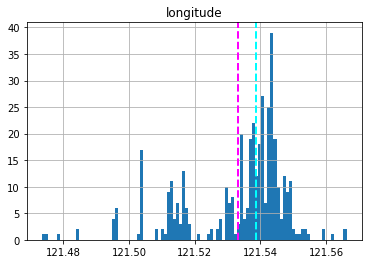

In [49]:
# Plot a histogram for each numeric feature
for col in numeric_features:
    #fig = plt.figure(figsize = (9,6))
    #data[col].hist(bins = 100, ax = )
    data[col].hist(bins = 100)
    plt.title(col)
    plt.axvline(data[col].mean(),color = 'magenta', linestyle = 'dashed', linewidth = 2)
    plt.axvline(data[col].median(),color = 'cyan', linestyle = 'dashed', linewidth = 2)
    plt.show()

## Check correlations

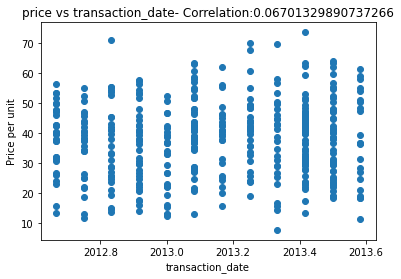

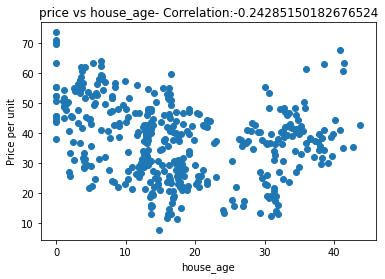

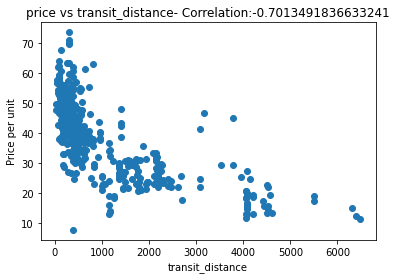

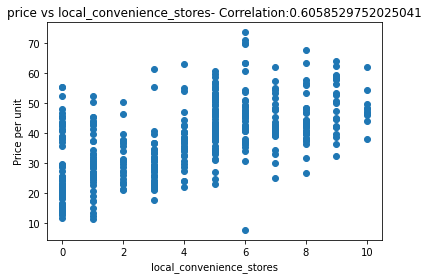

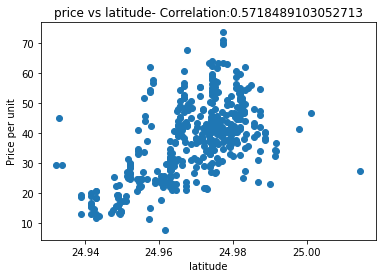

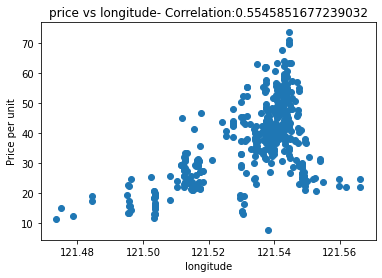

In [50]:
for col in numeric_features:
    feature = data[col]
    label = data["price_per_unit"]
    correlation = feature.corr(label)
    plt.scatter(feature, y = label )
    plt.xlabel(col)
    plt.ylabel("Price per unit")
    plt.title("price vs " + col + "- Correlation:" + str(correlation))
    plt.show()

Transaction date and Local convenience store seems to be discete values, so can be treated as categorical features.

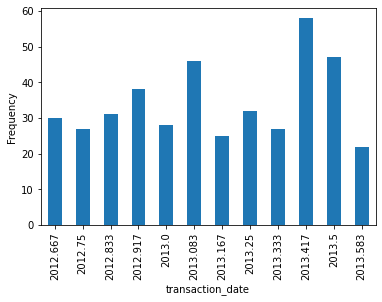

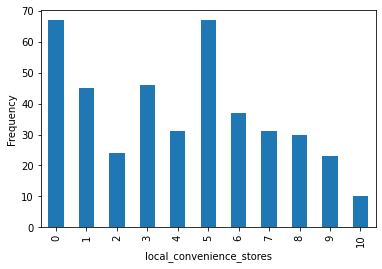

In [52]:
categorical_features = ["transaction_date","local_convenience_stores" ]
for col in categorical_features:
    counts = data[col].value_counts().sort_index()
    counts.plot.bar()
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

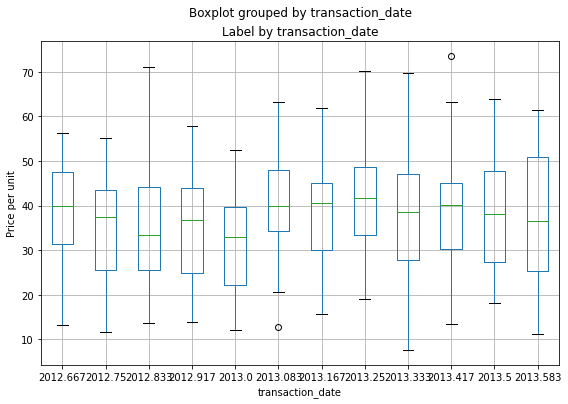

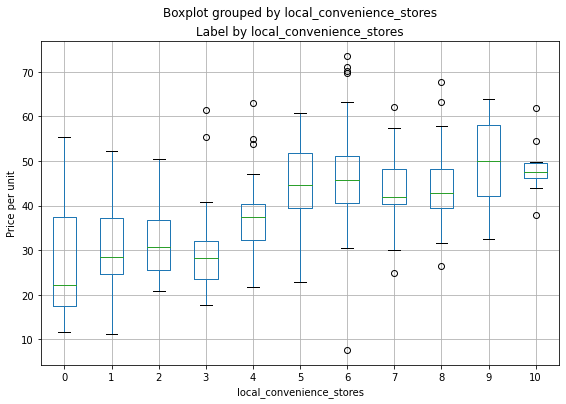

In [53]:
for col in categorical_features:
    fig = plt.figure(figsize = (9,6))
    ax = fig.gca()
    data.boxplot(column = "price_per_unit", by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Price per unit")
plt.show()


## Separate features and label into training and validation set
(Transaction date does not seem to be very informative, so omit it)

In [61]:
from sklearn.model_selection import train_test_split
# Separate features (columns 1 [house_age] to the last but one) and labels (the last column)
X, y = data[data.columns[1:-1]].values, data[data.columns[-1]].values
# Split data 70%-30% into training set and test set
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size= 0.30, random_state= 0)
print("Training set: %d rows \n Test set: %d rows" % ( X_train.shape[0], X_test.shape[0]))

Training set: 287 rows 
 Test set: 124 rows


In [65]:
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


## Preprocess the data and train the model in a pipeline
Normalize the training features and then use RandomForestRefressor to train a model

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer

# Define preprocessing for numeric columns (scale them)
numeric_features = [0,1,3,4]
numeric_transformer = Pipeline(steps = [('scalar', StandardScaler())])

# Combine preprocessing steps
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer,numeric_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor',RandomForestRegressor())])

# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train,(y_train))

print(model)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scalar',
                                                                   StandardScaler())]),
                                                  [0, 1, 3, 4])])),
                ('regressor', RandomForestRegressor())])


## Evaluate the model

MSE:  31.641987802918898
RMSE : 5.62512113673287
R2 Score:  0.7761851145369099


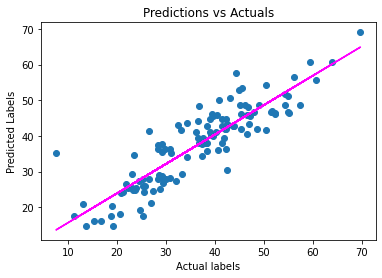

In [73]:
from sklearn.metrics import mean_squared_error, r2_score

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE: ", mse)
rmse = np.sqrt(mse)
print("RMSE :", rmse)
r2 = r2_score(y_test, predictions)
print("R2 Score: ", r2)

# Plot predicted vs actuals

plt.scatter(y_test, predictions)
plt.xlabel("Actual labels")
plt.ylabel("Predicted Labels")
plt.title("Predictions vs Actuals")

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')

plt.show()



## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [77]:
# Your code to use the trained model

import joblib

# Save the model as a pickle file
filename = './real_estate_mymodel.pkl'
joblib.dump(model,filename)

#Load the model from the file
loaded_model = joblib.load(filename)

# An array of features for each transaction (don't include the transaction date)
X_new = np.array([[16.2,289.3248,5,24.98203,121.54348],
                  [13.6,4082.015,0,24.94155,121.5038]])

# Use the model to predict unit price
results = loaded_model.predict(X_new)
print("Predictions:")
for pred in results:
    print(round(pred,2))

Predictions:
46.75
16.2
